In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, RocCurveDisplay, roc_curve 

In [19]:
df = pd.DataFrame()
for i in range(1, 6):
    df_dmp = pd.read_csv(f'gas+turbine+co+and+nox+emission+data+set/gt_201{i}.csv')
    df = pd.concat([df, df_dmp])

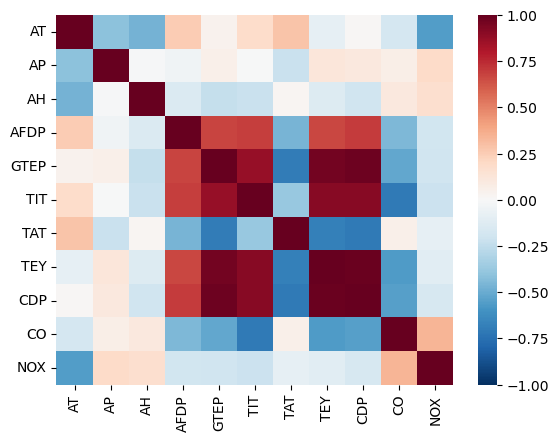

In [20]:
corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, cmap='RdBu_r')
None

In [21]:
df.loc[df['CO'] >= 4.3, 'target'] = -1
df.loc[df['CO'] < 4.3, 'target'] = 1

In [22]:
X = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Линейное ядро

Accuracy: 0.9380699605281068
Precision: 0.9492340042054671
Recall: 0.9818238309771633


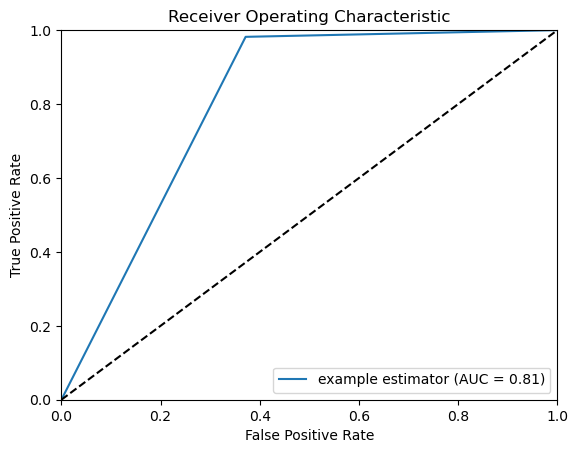

In [24]:
clf_lin = svm.SVC(kernel='linear')
clf_lin.fit(X_train, y_train)

y_pred = clf_lin.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='example estimator')
display.plot()
plt.plot([0, 1], [0, 1], 'k--')  # Диагональная линия без информации
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

RBF ядро

Accuracy: 0.9192867837212467
Precision: 0.920431654676259
Recall: 0.9937859251203977


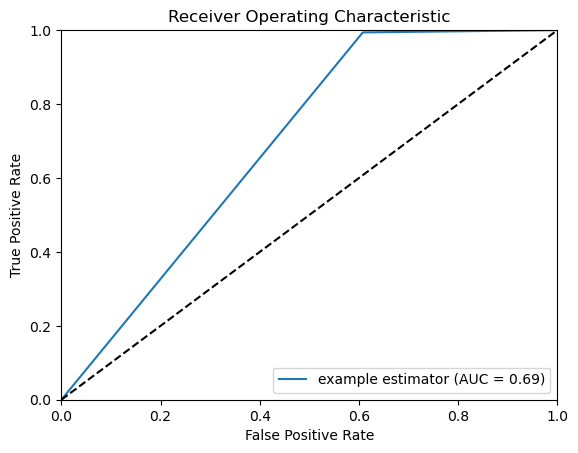

In [25]:
clf_rbf = svm.SVC(kernel='rbf', gamma='scale')
clf_rbf.fit(X_train, y_train)

y_pred = clf_rbf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='example estimator')
display.plot()
plt.plot([0, 1], [0, 1], 'k--')  # Диагональная линия без информации
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Poly ядро

Accuracy: 0.9348033210834354
Precision: 0.9487797529376318
Recall: 0.9784060897933821


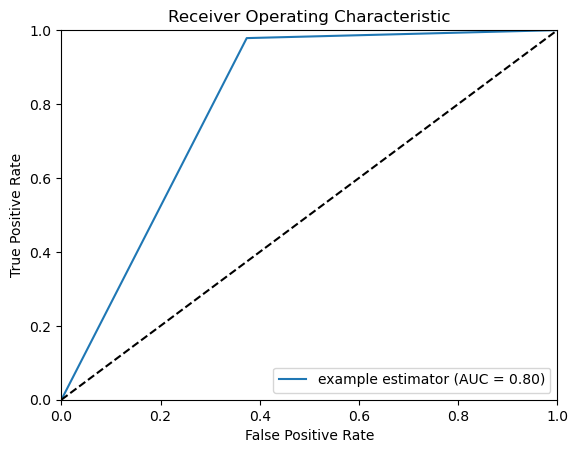

In [26]:
clf_poly = svm.SVC(kernel='poly', gamma='scale')
clf_poly.fit(X_train, y_train)

y_pred = clf_poly.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='example estimator')
display.plot()
plt.plot([0, 1], [0, 1], 'k--')  # Диагональная линия без информации
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()